<a href="https://colab.research.google.com/github/STYLO009/machine_learning/blob/main/onlinefraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('onlinefraud.csv')

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.value_counts()

step  type      amount      nameOrig     oldbalanceOrg  newbalanceOrig  nameDest     oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
743   TRANSFER  6311409.28  C1529008245  6311409.28     0.00            C1881841831  0.00            0.00            1        0                 1
1     CASH_IN   270.78      C619985571   4184966.65     4185237.43      C875917495   3019.00         0.00            0        0                 1
                484.57      C1859216983  5422437.76     5422922.33      C657736958   5638778.53      5579568.65      0        0                 1
                783.31      C1585711807  8150331.93     8151115.24      C284686302   2013.12         1229.81         0        0                 1
                863.08      C1554118033  9290756.54     9291619.62      C5592464     5577.88         4714.80         0        0                 1
                                                                                                                                 

In [ ]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

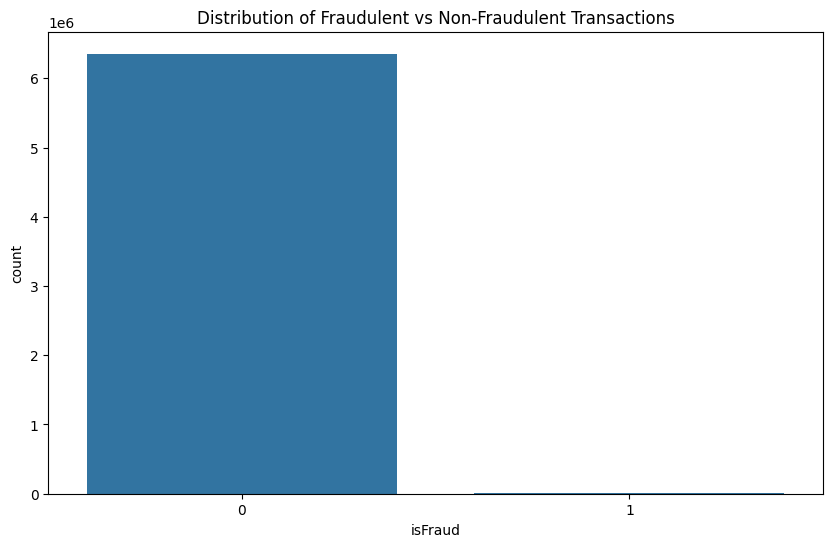

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

In [ ]:
df_cleaned = df.copy()

In [ ]:
df_cleaned.dropna(inplace=True)
df_cleaned.drop_duplicates(inplace=True)

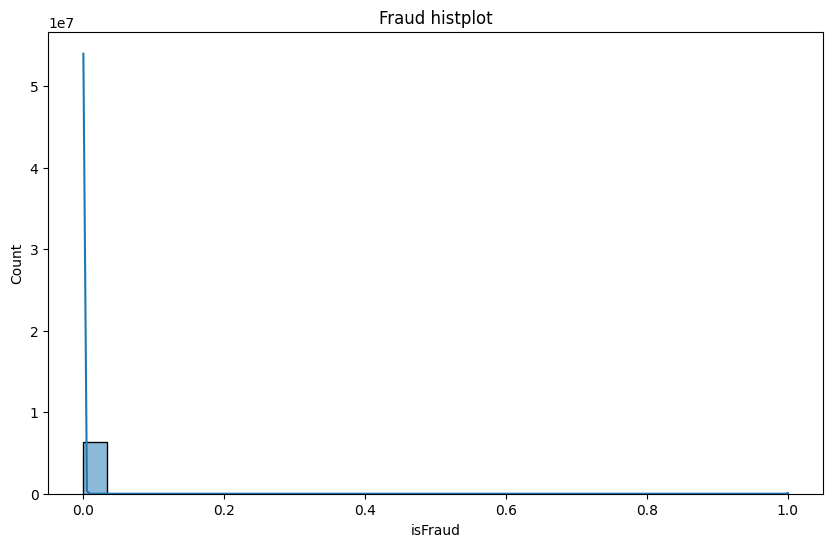

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_cleaned, x='isFraud', bins=30, kde=True)
plt.title('Fraud histplot')
plt.show()

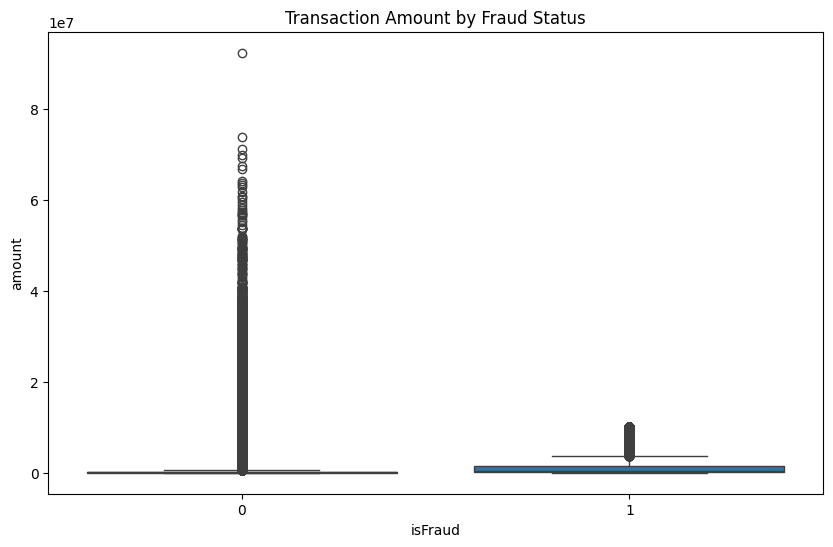

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned, x='isFraud', y='amount')
plt.title('Transaction Amount by Fraud Status')
plt.show()

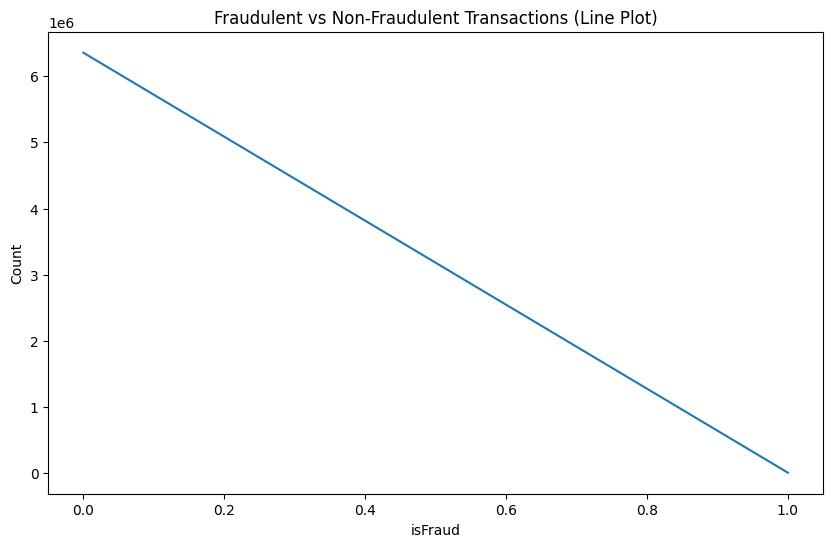

In [ ]:
plt.figure(figsize=(10,6))
fraud_counts = df_cleaned['isFraud'].value_counts().sort_index()
sns.lineplot(x=fraud_counts.index, y=fraud_counts.values)
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.title('Fraudulent vs Non-Fraudulent Transactions (Line Plot)')
plt.show()

In [ ]:
df_cleaned = df_cleaned.fillna(0)   # or use imputation


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_orig = LabelEncoder()
le_dest = LabelEncoder()

df_cleaned['nameOrig'] = le_orig.fit_transform(df_cleaned['nameOrig'].astype(str))
df_cleaned['nameDest'] = le_dest.fit_transform(df_cleaned['nameDest'].astype(str))

df_cleaned = pd.get_dummies(df_cleaned, columns=['type'], drop_first=True)



In [ ]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop('isFraud', axis=1)
y = df_cleaned['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1272524,))

In [ ]:
df_cleaned.shape

(6362620, 14)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 0.9996785915236176
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.99      0.76      0.86      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.88      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524

[[1270863      18]
 [    391    1252]]


In [ ]:
importance = pd.Series(model.feature_importances_, index=X_train.columns)
importance.sort_values(ascending=False).head(20)


oldbalanceOrg     0.266042
newbalanceOrig    0.155459
amount            0.149749
type_TRANSFER     0.077746
newbalanceDest    0.069283
step              0.066877
nameDest          0.062190
oldbalanceDest    0.056899
type_PAYMENT      0.044684
type_CASH_OUT     0.043843
nameOrig          0.006560
type_DEBIT        0.000351
isFlaggedFraud    0.000316
dtype: float64

In [ ]:
%pip install xgboost

from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

Note: you may need to restart the kernel to use updated packages.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_xgb = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 0.9956236581785491
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.23      0.99      0.37      1643

    accuracy                           1.00   1272524
   macro avg       0.61      1.00      0.68   1272524
weighted avg       1.00      1.00      1.00   1272524

[[1265321    5560]
 [      9    1634]]


In [ ]:
%pip install lightgbm
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    num_leaves=31,
    class_weight='balanced',
    random_state=42
)

lgb_model.fit(X_train, y_train)


Note: you may need to restart the kernel to use updated packages.
[LightGBM] [Info] Number of positive: 6570, number of negative: 5083526
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2050
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=200,
               random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_lgb = lgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.9956236581785491
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.23      0.99      0.37      1643

    accuracy                           1.00   1272524
   macro avg       0.61      1.00      0.68   1272524
weighted avg       1.00      1.00      1.00   1272524

[[1265321    5560]
 [      9    1634]]


In [ ]:
import joblib
joblib.dump(model, "fraud_model.pkl")


['fraud_model.pkl']